In [1]:
%matplotlib inline
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
import astropy.units as u 
from astropy.table import QTable
from matplotlib import *
from matplotlib import pyplot as plt
from  matplotlib.legend  import  Legend 
import numpy as np
from numpy import matrix
from numpy import linalg
import sqlite3 
from seaborn import load_dataset
import numpy as ndarray
import pandas as pd
from sympy import integrate, init_printing
from sympy.abc import x
init_printing(use_latex="mathjax")
import scipy.fftpack as fourier
import math 
import configparser
from matplotlib import pyplot as plt, rcParams
from scipy.integrate import quad
import scipy.fftpack
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq
import matplotlib.cm as cm
from scipy.signal import general_gaussian
from scipy import signal
import matplotlib as mpl
from scipy.fftpack import fft, fftshift


In [186]:
Espectro = pd.read_csv('../Desktop/D_ell.csv')
D_ell = Espectro.iloc[:,1] 
_ell = Espectro.iloc[:,0] 

In [3]:
tbl=pd.DataFrame(_ell)


M Tilde 

In [4]:

#Primero hay que obtener los valores de C_l
C_l=[];
for l in range(2,5050,1):
    C_l=(2 * math.pi* D_ell)/(l*(l+1))  
    
C_l2=np.zeros((38151))
C_l1=np.concatenate((C_l,C_l2))

In [5]:
#Generar M tilde
MT=[]
for lx in range(26,43200,36):
    mt=[]
    for ly in range(26,43200,36):
        if math.sqrt(lx**2+ly**2)<=5049:
            m=C_l1[round(math.sqrt(lx**2+ly**2))]
        else:
            m=0
        mt.append(m)
    MT.append(mt)


In [6]:
def f(lx,ly):
    MT=[]
    for lx in range(26,43200,36):
        mt=[]
        for ly in range(26,43200,36):
            if math.sqrt(lx**2+ly**2)<=5049:
                m=C_l1[round(math.sqrt(lx**2+ly**2))]
            else:
                m=0
            mt.append(m)
        MT.append(mt)
    return np.array(MT)

In [7]:
L=f(lx,ly)

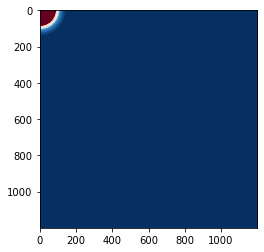

In [8]:
plt.imshow(np.real(L),cmap=cm.RdBu_r,vmin=1e-12,vmax=1e-5)

In [9]:
#G Tilde

#N para una dimensión
mu,sigma=0,1   #defino los valores de mu y sigma para este espectro angular de potencias

N = np.random.normal(mu,sigma, size=(1200,1200))

In [10]:
Gt=(numpy.fft.fft2(N))/(0.5/60/180*np.pi)

In [11]:
# M 
M=(numpy.fft.ifft2(L*Gt))

Text(0, 0.5, '$\\Theta_y(deg)$')

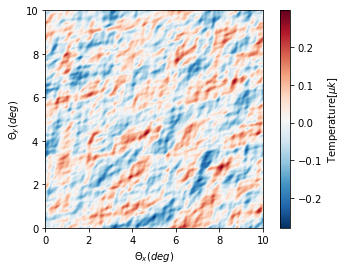

In [12]:
im=plt.imshow(np.real(M),cmap=cm.RdBu_r)
plt.colorbar(label=r"Temperature$[\mu k]$");
#plt.clim(-300e-6,300e-6)
im.set_extent([0,10,0,10])
plt.xlabel('$\Theta_x(deg)$')
plt.ylabel('$\Theta_y(deg)$')
#plt.savefig('CMBfinal.pdf')

/Users/camilaarosbunster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


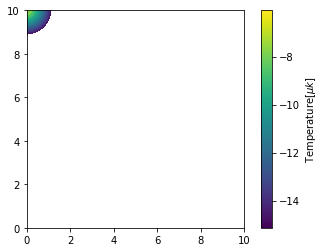

In [13]:
p=plt.imshow(np.log(np.real(MT)))
plt.colorbar(label=r"Temperature$[\mu k]$");
p.set_extent([0,10,0,10])

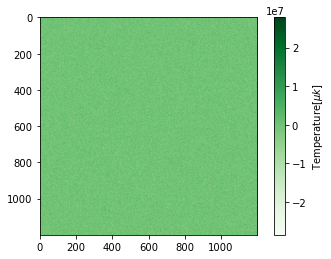

In [14]:
IM=plt.imshow(np.real(Gt),cmap='Greens')
plt.colorbar(label=r"Temperature$[\mu k]$");
#IM.set_extent([0,10,0,10])


APODIZACIÓN

In [15]:
#apodizando el mapa
W=[]
for nx in range(0,1200,1):
    w=[]
    for ny in range(0,1200,1):
        ww= math.sin(nx*math.pi/1200)*math.sin(ny*math.pi/1200)
        w.append(ww)     
    W.append(w)


In [16]:
Mapod=M*W

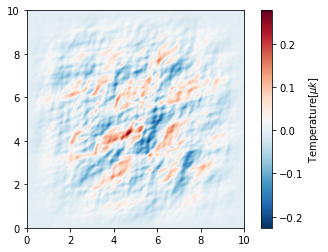

In [17]:
im=plt.imshow(np.real(Mapod),cmap=cm.RdBu_r)
plt.colorbar(label=r"Temperature$[\mu k]$");
#plt.clim(-300e-6,300e-6)
im.set_extent([0,10,0,10])
#plt.savefig('CMBapodafinal2.pdf')

In [157]:
#Aplicando FFT a Mapod
M_tilde=numpy.fft.fft2(Mapod)
MTILDE=np.real(M_tilde)


In [372]:
df=pd.DataFrame(np.real(M_tilde))


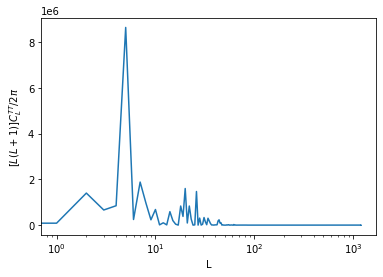

In [188]:
ell_max=600
ell=np.arange(2*ell_max)

ell_x, ell_y = np.meshgrid(ell, ell) # esto genera dos matrices para los índices en (x,y
ell_dist = (ell_x**2 + ell_y**2)**0.5
C_ell = np.zeros(1200)

for i in range(1,1200,1):
    mask=(ell_dist>i)&(ell_dist<=i+2)
    C_ell[i]=(MTILDE[mask].mean())**2
    
D_Ell=np.zeros(1200)
for j in range(1,1200,1):
    D_Ell[j]=(j*(j+1)*C_ell[j])/(2*np.pi)

plt.semilogx(ell,D_Ell)
plt.xlabel('L')
plt.ylabel('$[L(L+1)]C_L^{TT}/2\pi$')
plt.savefig('espectrodepotencia.pdf')

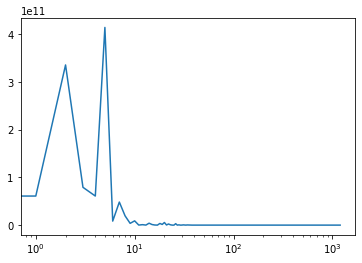

In [167]:
ell_max = 600 
ell = np.arange(2*ell_max) # el tamaño de esto debe ser igual a un lado de Mtilde

ell_x, ell_y = np.meshgrid(ell, ell) # esto genera dos matrices para los índices en (x,y
ell_dist = (ell_x**2 + ell_y**2)**0.5
C_ell = np.zeros(1200)
for i in range(0,1199,1):
    mask = (ell_dist > i) & (ell_dist <= i+2)
    C_ell[i] = (MTILDE[mask].mean())**2

centro=np.zeros(1200) 
for j in range(0,1199,1):
    centro=(ell[j]+ell[j+1])/2
D_ell = (centro*(centro+1)*C_ell)/(2*np.pi)
plt.semilogx(ell, D_ell)
plt.plot(_ell,D_ell)

In [142]:
len(centro)


1199

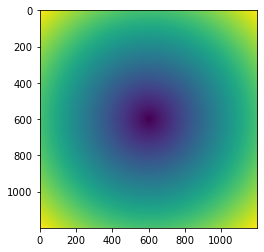

In [170]:
plt.imshow(ell_dist)

/Users/camilaarosbunster/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/camilaarosbunster/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


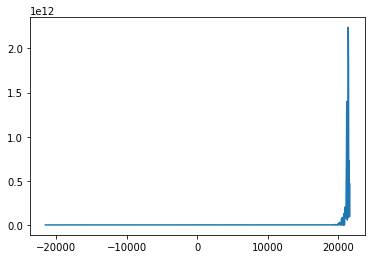

In [169]:

l_lin=np.linspace(-43200/2,43200/2,1200)
ell_grid=np.meshgrid(l_lin,l_lin)
ell_dist=np.sqrt(ell_grid[0]**2+ell_grid[1]**2)

dl = 25  # Delta anillos
numBins = 1200
C_ell = np.zeros(numBins)
ell = (np.arange(numBins+1)*dl).astype("int")
centro=(ell[1:]+ell[:-1])/2

for j in range(numBins):
    mask=(ell_dist>=ell[j])&(ell_dist<ell[j+1])
    C_ell[j]=np.mean(MTILDE[mask])**2
    
D_ell=(C_ell*centro*(centro+1))/(2*np.pi)
plt.plot(l_lin, D_ell)

In [171]:
c

array([1.25000e+01, 3.75000e+01, 6.25000e+01, ..., 2.99375e+04,
       2.99625e+04, 2.99875e+04])

In [195]:
(2*np.pi)/(0.000145444)

43200.030989106366